<a href="https://colab.research.google.com/github/ndawinata/googleCO/blob/master/CNN_Awan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)
# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)
print(c)

Num GPUs Available:  1
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
import matplotlib.pyplot as plt
import cv2
import warnings
import numpy as np
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path_datasets = './drive/MyDrive/Colab Notebooks/Datasets/dataset Awan'

In [ ]:
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

image_shape = (64, 64, 1)

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(64, 64, 3), activation='relu'))
model.add(ZeroPadding2D(padding=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))  # sigmoid

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 60, 60, 32)        2432      
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 27, 27, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)              

In [ ]:
adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
!rm -rf ./Graph
!rm -rf ./model

In [ ]:
batch_size = 20
train_path = path_datasets + '/train'
test_path = path_datasets + '/test'
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    batch_size=batch_size,
    class_mode='binary')

callbacks = TensorBoard(log_dir='./Graph')

checkpoint_filepath="/content/model/CNN-AWAN-{epoch:02d}-{accuracy:.4f}-{val_accuracy:.4f}.h5"

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

result = model.fit(
    train_image_gen, 
    epochs=10,
    steps_per_epoch=50,
    validation_data=test_image_gen,
    validation_steps=10,
    callbacks=[callbacks, model_checkpoint_callback])

# model.save_weights('model.h5')

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/10
50/50 [==============================] - 59s 1s/step - loss: 0.7435 - accuracy: 0.6340 - val_loss: 0.5086 - val_accuracy: 0.7700
Epoch 2/10
50/50 [==============================] - 56s 1s/step - loss: 0.4516 - accuracy: 0.7958 - val_loss: 0.5257 - val_accuracy: 0.8250
Epoch 3/10
50/50 [==============================] - 56s 1s/step - loss: 0.4518 - accuracy: 0.7871 - val_loss: 0.6813 - val_accuracy: 0.6550
Epoch 4/10
50/50 [==============================] - 56s 1s/step - loss: 0.4197 - accuracy: 0.8280 - val_loss: 0.5272 - val_accuracy: 0.6850
Epoch 5/10
50/50 [==============================] - 56s 1s/step - loss: 0.3990 - accuracy: 0.8255 - val_loss: 0.5924 - val_accuracy: 0.6400
Epoch 6/10
50/50 [==============================] - 56s 1s/step - loss: 0.3788 - accuracy: 0.8200 - val_loss: 0.6565 - val_accuracy: 0.5350
Epoch 7/10
50/50 [==============================] - 56s 1s/step - loss: 0.444

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir Graph/

Accuracy 0.14255644
it's a Cumulonimbus


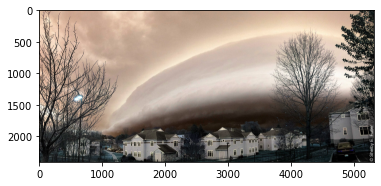

In [ ]:
def classifier(path):
    raw_img = image.load_img(path, target_size=(64, 64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    prediction = model.predict_classes(raw_img)[0][0]
    accuracy = model.predict(raw_img)[0][0]
    plt.imshow(cv2.imread(path))
    print('Accuracy', accuracy)
    if (prediction):
        print("it's a Cumulus")
    else:
        print("it's a Cumulonimbus")


classifier("cb_04.jpg")